# Polynomial Regression from scratch


After finishing one of the courses I want to recap wy knowledge and implement Polynomial Regression from scratch.
At first let's import all libraries that we need for this task:


In [213]:
import numpy as np
import matplotlib.pyplot as plt

Let's generate some quadratic-looking data for our Polynomial regression. We'll add some gaussian noise so that it will look more or less realistic. Also let's visualize our data so that we'll see that it is indeed quadratic and not linear.

Text(0, 0.5, 'Y axis')

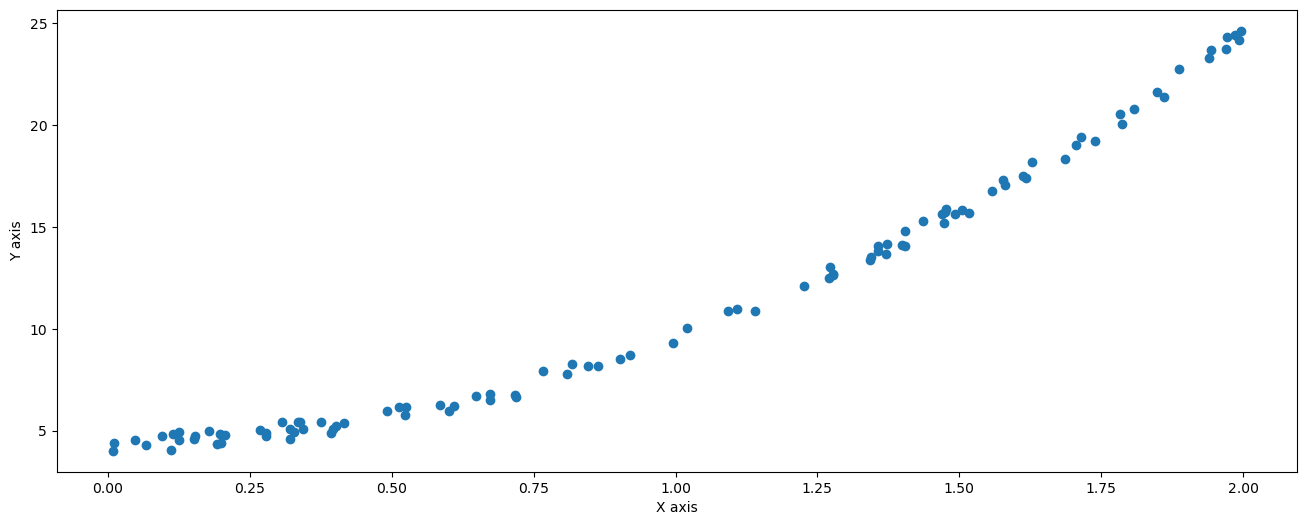

In [214]:
X=2*np.random.rand(100,1)
y = 4+5*X**2+np.random.rand(100,1)
plt.figure(figsize = (16,6))
plt.scatter(X,y)
plt.xlabel("X axis")
plt.ylabel("Y axis")

Let's check how Linear regression will fulfill our needs for this task. So firstly - let's implement Linear regression algorithm and write down our functions to do that.

The equation for the cost function is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

In [215]:
def cost_function(X,y,w,b):
    m = X.shape[0]
    total_cost = 0
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        total_cost += error**2
    return total_cost/(2*m)

Gradient (partial derivatives) are calucated using this formulas:

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}   \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [216]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dJ_db = 0
    dJ_dw = np.zeros_like(X[0])
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dJ_dw[j]+= error*X[i,j]
        dJ_db += error
    dJ_db =dJ_db/ m
    dJ_dw =dJ_dw /m 
    return dJ_db, dJ_dw

Gradient descent algoritm - repeat iteratively until convergence:

$$\begin{align*}
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align*}$$

In [217]:
def gradient_descent(X,y,w,b,epsilon,alpha):
    old_cost = cost_function(X,y,w,b)
    convergence = False
    J_history = []
    while convergence == False:
        dJ_db, dJ_dw = compute_gradient(X,y,w,b)
        temp_w = w - alpha*dJ_dw
        temp_b = b - alpha*dJ_db
        new_cost = cost_function(X,y,temp_w,temp_b)
        
        if old_cost - new_cost <= epsilon:
            convergence = True
        else:
            old_cost = new_cost
            w = temp_w
            b = temp_b
        J_history.append( cost_function(X, y, w, b))
    return b,w,J_history

In [218]:
w = np.zeros_like(X[0])
b = 0.
epsilon = 1e-5     # convergence rate
alpha = 1e-4       # learning rate
b,w,J_hist_0 = gradient_descent(X,y,w,b,epsilon,alpha)
pred_y = np.dot(X,w)+b
print('b',b)
print('w',w)
print('cost',J_hist_0[-1])

b [2.92160389]
w [8.79398928]
cost [1.39103028]


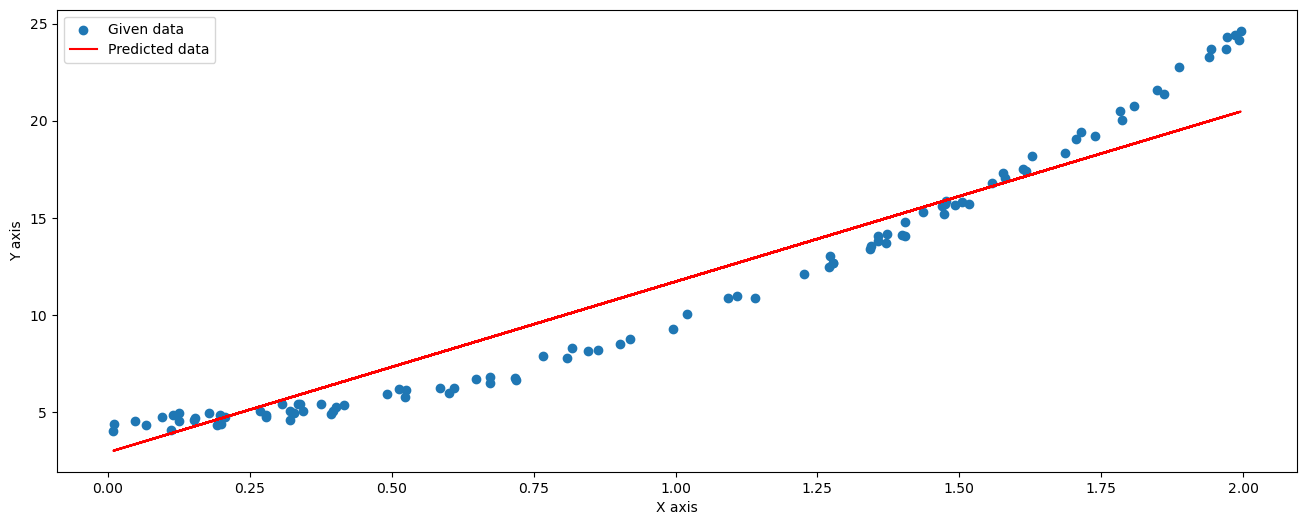

In [219]:
plt.figure(figsize = (16,6))
plt.scatter(X,y,label = "Given data")
plt.plot(X,pred_y ,'r-',label = "Predicted data")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

So as we can see - Linear function can be useful but not very precise. Visualy we see that data distribution looks quite quadratic so we shoud try to implement Polynomial regression. To do that we shpuld do some feature engineering. Basicaly we will use the same Linear regression algorithm but we will add another column - raise features to the second power.

In [220]:
X_2 = X**2
new_X = np.c_[X,X_2]

In [221]:
w = np.zeros_like(new_X[0])
b = 0.
epsilon = 1e-5     # convergence rate
alpha = 1e-4       # learning rate
b,w,J_hist_1 = gradient_descent(new_X,y,w,b,epsilon,alpha)
pred_y = np.dot(new_X,w)+b
print('b',b)
print('w',w)
print('cost',J_hist_1[-1])

b [2.87902635]
w [2.77144578 4.00562574]
cost [0.22774871]


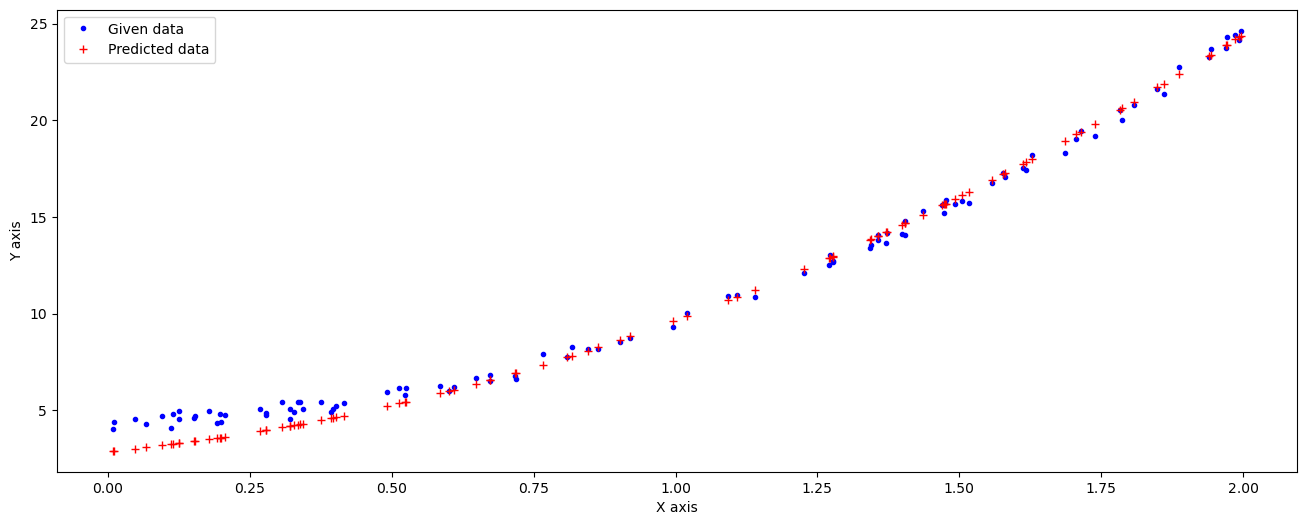

In [222]:
plt.figure(figsize = (16,6))
# plt.scatter(X,y)
plt.plot(X,y,"b.",label = "Given data")
plt.plot(X,pred_y,"r+",label = "Predicted data")
plt.plot()
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

In [223]:
X_2 = X**2
X_3 = X**3
new_X = np.c_[X,X_2,X_3]

In [224]:
w = np.zeros_like(new_X[0])
b = 0.
epsilon = 1e-5     # convergence rate
alpha = 1e-4       # learning rate
b,w,J_hist_2 = gradient_descent(new_X,y,w,b,epsilon,alpha)
pred_y = np.dot(new_X,w)+b
print('b',b)
print('w',w)
print('cost',J_hist_2[-1])

b [3.74866018]
w [2.30233521 1.82718402 1.22090883]
cost [0.12688711]


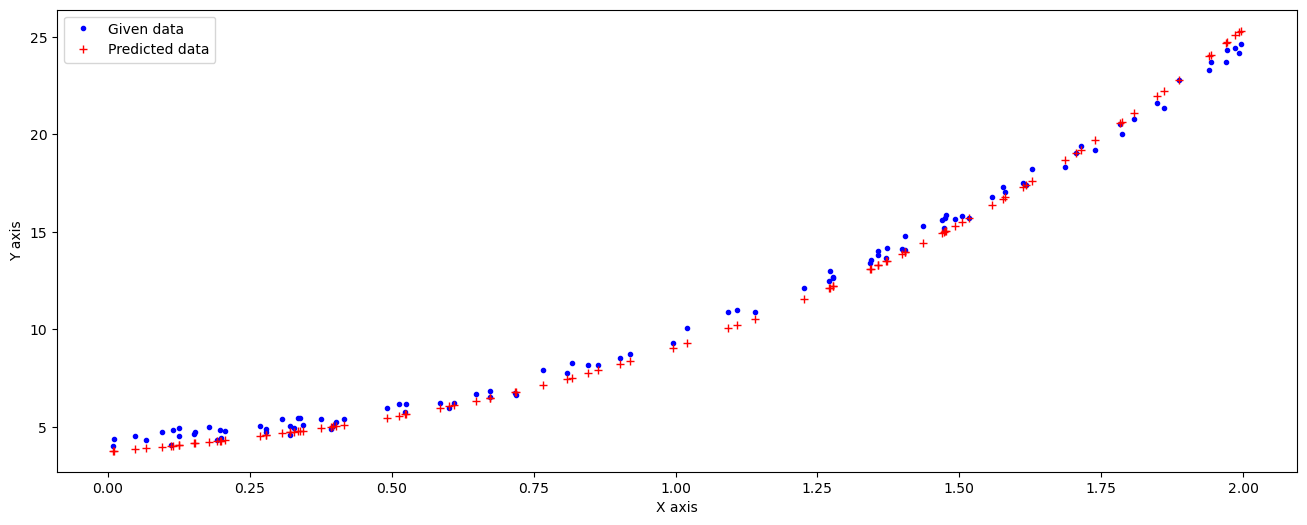

In [225]:
plt.figure(figsize = (16,6))

plt.plot(X,y,"b.",label = "Given data")
plt.plot(X,pred_y,"r+",label = "Predicted data")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

In [226]:
print('Final cost for Linear Regression: ',J_hist_0[-1])
print('Final cost for Polynomial Regression with quadratic features: ',J_hist_1[-1])
print('Final cost for Polynomial Regression with quadratic and cubic features: ',J_hist_2[-1])


Final cost for Linear Regression:  [1.39103028]
Final cost for Polynomial Regression with quadratic features:  [0.22774871]
Final cost for Polynomial Regression with quadratic and cubic features:  [0.12688711]


As can be seen - for the given data set Polynomial Regression with quadratic and cubic features gives more adequate results. But we should remember that Polynomial Regression tends to overfitting more than Linear Regression so when used for practical purposes - it could be a good move to do some regularization.

If someone will find any errors - I'll be grateful to see the remarks in the comments.